<a href="https://colab.research.google.com/github/akshita2k/Linear_regression_3D/blob/master/Linear_regression_3D_rep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
from numpy import math 
from math import exp
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [0]:
boston=load_boston()

In [0]:
features=pd.DataFrame(boston.data,columns=boston.feature_names)
target=pd.DataFrame(boston.target,columns=['TARGET'])

In [0]:
data=pd.concat([features,target],axis=1)

In [0]:
sep=0.8*len(data)
sep=int(sep)

x1_train=np.array(data['RM'][0:sep])
x2_train=np.array(data['LSTAT'][0:sep])
y1_train=np.array(data['TARGET'][0:sep])

x1_test=np.array(data['RM'][sep:])
x2_test=np.array(data['LSTAT'][sep:])
y1_test=np.array(data['TARGET'][sep:])


x1_train = x1_train/x1_train.mean()
x2_train = x2_train/x2_train.mean()
y1_train = y1_train/y1_train.mean()
print(len(x1_train))
print(len(x2_train))
print(len(y1_train))

x1_test=x1_test/(x1_test.mean())
x2_test=x2_test/(x2_test.mean())
y1_test=y1_test/(y1_test.mean())

404
404
404


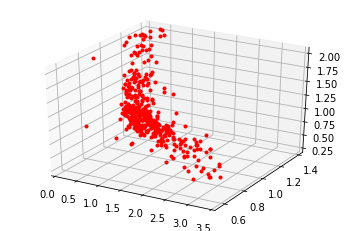

In [0]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1,projection='3d')
ax.plot(x2_train,x1_train,y1_train,'r.')
plt.show()


In [0]:
def hypothesis(a,x1,x2,b,c,d):
    return a * x1 + b*np.exp((-c*x2)) +d

In [0]:
def error(a,x1,x2,b,y,c,d):
    e=0
    m=len(y)
    for i in range(m):
        e+=np.power((hypothesis(a,x1[i],x2[i],b,c,d)-y[i]),2)
    return (1/(2*m)*e)

In [0]:
def step_gradient(a,x1,x2,b,y,learning_rate,c,d):
    grad_a=0
    grad_b=0
    grad_c=0
    grad_d=0
   
   
    m=len(y)
    for i in range(m):
        grad_a += 2/m * (hypothesis(a,x1[i],x2[i],b,c,d)-y[i])*x1[i]
        grad_b += 2/m * (hypothesis(a,x1[i],x2[i],b,c,d)-y[i])*np.exp((-c*x2[i]))
        grad_c += 2/m * (hypothesis(a,x1[i],x2[i],b,c,d)-y[i])*(-b*x2[i]*np.exp((-c*x2[i])))
        grad_d += 2/m * (hypothesis(a,x1[i],x2[i],b,c,d)-y[i])
     
       
    a=a-(grad_a*learning_rate)
    b=b-(grad_b*learning_rate)
    c=c-(grad_c*learning_rate)
    d=d-(grad_d*learning_rate)
   
    
    
    return a,b,c,d

In [0]:
def descend(initial_a,initial_b,initial_c,initial_d,x1,x2,y,learning_rate,iterations):
    a=initial_a
    b=initial_b
    c=initial_c
    d=initial_d
  
   
    for i in range(iterations):
        e=error(a,x1,x2,b,y,c,d)
        a,b,c,d=step_gradient(a,x1,x2,b,y,learning_rate,c,d)
        if i % 1000 == 0:
            print(f"Error: {e},a:{a},b:{b},c:{c},d:{d}")
    return a,b,c,d

In [0]:
init_a=1
init_b=1
init_c=1
init_d=1


iters=10000
learning_rate=0.01

In [0]:
final_a,final_b,final_c,final_d=descend(init_a,init_b,init_c,init_d,x1_train,x2_train,y1_train,learning_rate,iters)

Error: 1.0373612051579928,a:0.9715962181227735,b:0.9880172109437829,c:1.0090441771434255,d:0.9715098311633039
Error: 0.026230153789681132,a:0.44838422163826,b:1.0412508441320538,c:1.219179128794449,d:0.18168304256779882
Error: 0.02403013571946086,a:0.5198775120192257,b:1.1907363499760484,c:1.267809694420565,d:0.06792886463461373
Error: 0.023200648066721712,a:0.58150769447952,b:1.2614785890908962,c:1.3110386985245441,d:-0.006773285937770665
Error: 0.022782640318106263,a:0.6356261249741083,b:1.2919655429799664,c:1.350362833354752,d:-0.06027259984826263
Error: 0.022508727328954346,a:0.6838189341001029,b:1.3022207043792249,c:1.3863771517336152,d:-0.10181952928853075
Error: 0.022300720562111985,a:0.7271612601163223,b:1.302557827098699,c:1.419355710297961,d:-0.13623597771851145
Error: 0.02213258417190664,a:0.766412734096691,b:1.2982405938996213,c:1.4495193434135807,d:-0.1660575958456877
Error: 0.021993277957851966,a:0.8021353654838316,b:1.2919271037547662,c:1.4771027937533487,d:-0.1926426050

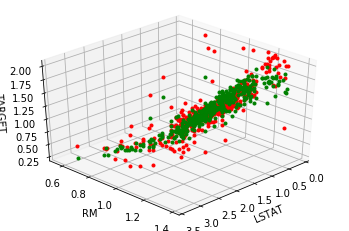

In [0]:

fig=plt.figure()
ax=fig.add_subplot(1,1,1,projection='3d')
ax.view_init(35, 45)

ax.plot3D(x2_train,x1_train,y1_train,'r.')
ax.plot3D(x2_train,x1_train, hypothesis(final_a,x1_train,x2_train,final_b,final_c,final_d),'g.')
ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("TARGET")
plt.show()

In [0]:
a=0.8347629727620609
b=1.2849404175773322
c=1.502352273831198
d=-0.2167440323636073

error(a,x1_train,x2_train,b,y1_train,c,d)

0.02187648984086556

In [0]:
error(a,x1_test,x2_test,b,y1_test,c,d)

0.03365493385413427

In [0]:
data.corr('pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
